# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [ ]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [ ]:
df = pd.read_csv('previsao_de_renda.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.
    

In [ ]:
var_qualitativa = df.select_dtypes(include=['object','bool'])
var_qualitativa.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia
0,2015-01-01,F,False,True,Empresário,Secundário,Solteiro,Casa
1,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa
2,2015-01-01,F,True,True,Empresário,Superior completo,Casado,Casa
3,2015-01-01,F,False,True,Servidor público,Superior completo,Casado,Casa
4,2015-01-01,M,True,False,Assalariado,Secundário,Solteiro,Governamental


In [ ]:
var_qualitativa['sexo'].value_counts()

,count
sexo,
F,10119
M,4881


In [ ]:
var_qualitativa['posse_de_veiculo'].value_counts()

,count
posse_de_veiculo,
False,9140
True,5860


In [ ]:
var_qualitativa['posse_de_imovel'].value_counts()

,count
posse_de_imovel,
True,10143
False,4857


In [ ]:
var_qualitativa['tipo_renda'].value_counts()

,count
tipo_renda,
Assalariado,7633
Empresário,3508
Pensionista,2582
Servidor público,1268
Bolsista,9


In [ ]:
var_qualitativa['educacao'].value_counts()

,count
educacao,
Secundário,8895
Superior completo,5335
Superior incompleto,579
Primário,165
Pós graduação,26


In [ ]:
var_qualitativa['estado_civil'].value_counts()

,count
estado_civil,
Casado,10534
Solteiro,1798
União,1078
Separado,879
Viúvo,711


In [ ]:
var_qualitativa['tipo_residencia'].value_counts()

,count
tipo_residencia,
Casa,13532
Com os pais,675
Governamental,452
Aluguel,194
Estúdio,83
Comunitário,64


<ipython-input-14-4869db2b09aa>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-14-4869db2b09aa>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-14-4869db2b09aa>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')


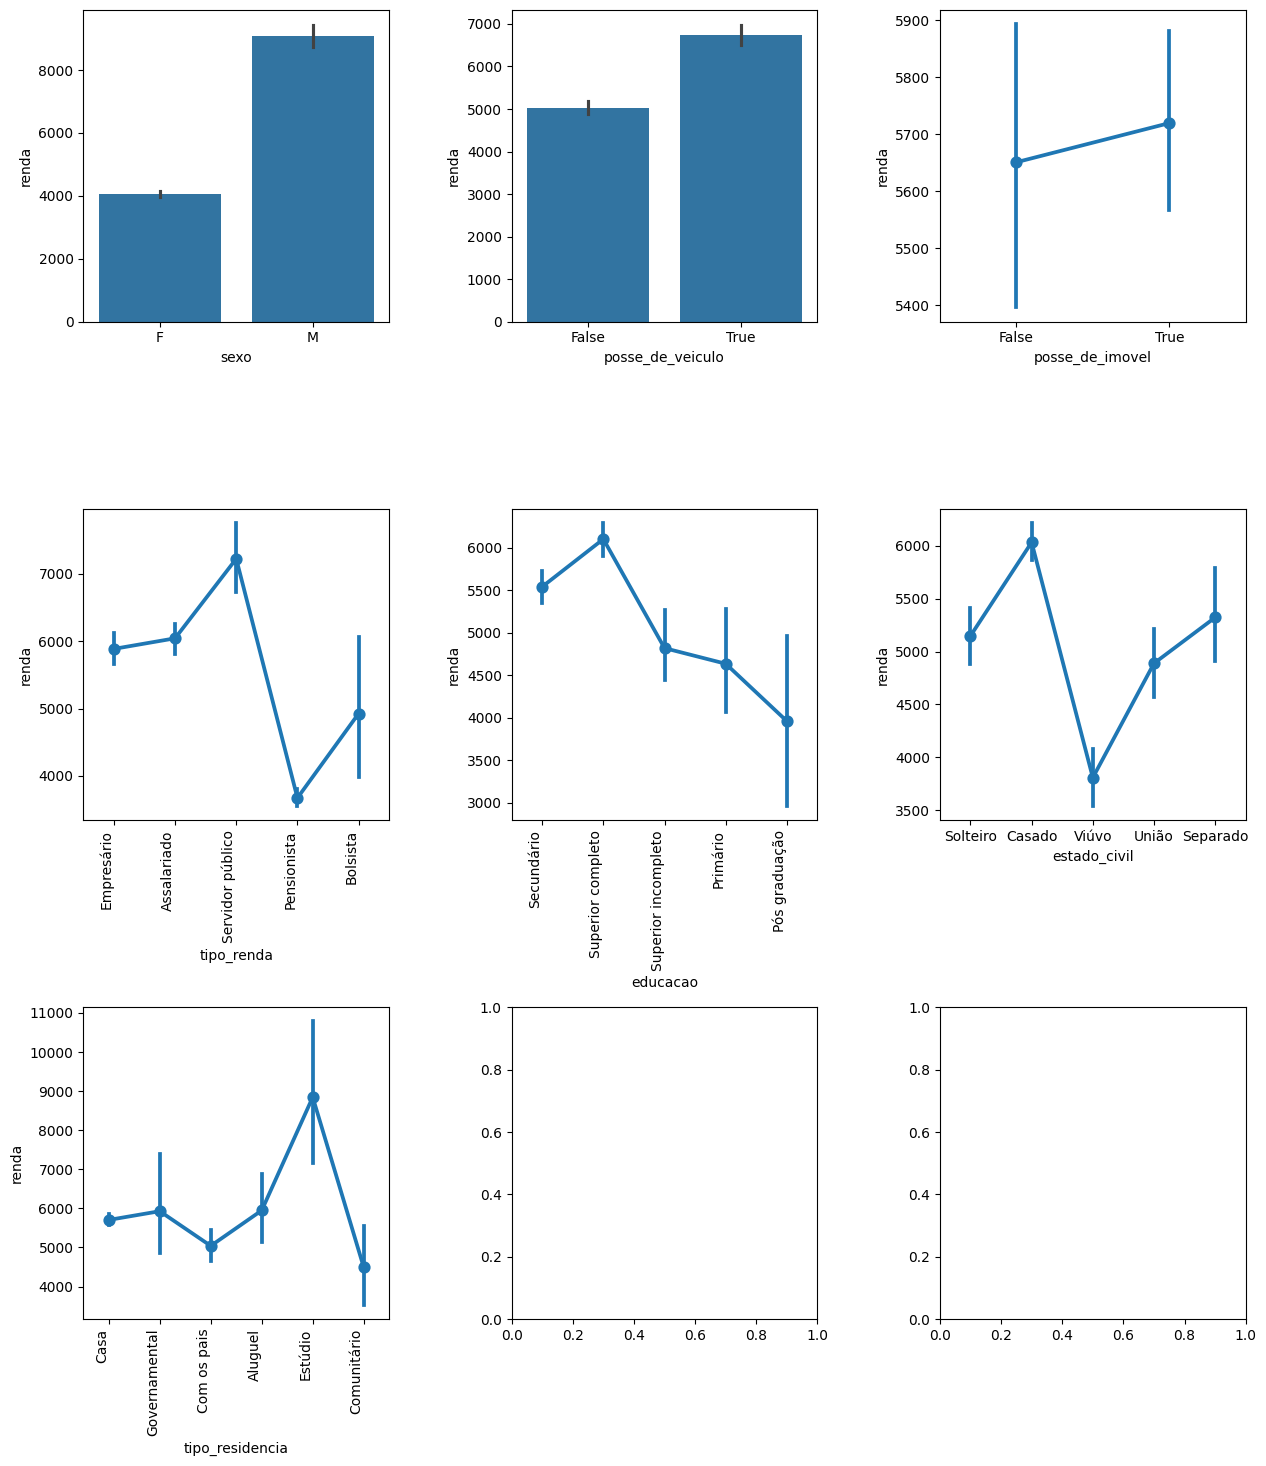

In [ ]:
plt.close('all')

plt.rc('figure', figsize=(15, 17))
fig, axes = plt.subplots(3, 3)

sns.barplot(ax = axes[0, 0],y = 'renda', x = 'sexo', data = df)
sns.barplot(ax = axes[0, 1],y = 'renda', x = 'posse_de_veiculo', data = df)
sns.pointplot(ax = axes[0, 2],y = 'renda', x = 'posse_de_imovel', data = df)
tipo_renda = sns.pointplot(ax = axes[1, 0],y = 'renda', x = 'tipo_renda', data = df)
educação = sns.pointplot(ax = axes[1, 1],y = 'renda', x = 'educacao', data = df)
sns.pointplot(ax = axes[1, 2],y = 'renda', x = 'estado_civil', data = df)
tipo_residencia = sns.pointplot(ax = axes[2, 0],y = 'renda', x = 'tipo_residencia', data = df)

tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.subplots_adjust(wspace=0.4, hspace=0.6)

In [ ]:
y, x = patsy.dmatrices('''np.log(renda) ~ C(sexo, Treatment(0))
                               + C(posse_de_veiculo, Treatment(0))
                               + C(posse_de_imovel, Treatment(0))
                               + C(tipo_renda, Treatment(1))
                               + C(educacao, Treatment(1))
                               + C(estado_civil, Treatment(1))
                               + C(tipo_residencia, Treatment(1))
                               + qtd_filhos
                               + idade
                               + tempo_emprego
                               + qt_pessoas_residencia
                       ''', data = df)

In [ ]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:24:30   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.1950      0.304     23.660      0.000       6.599       7.791
C(sexo, Treatment(0))[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
C(posse_de_veiculo, Treatment(0))[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
C(posse_de_imovel, Treatment(0))[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
C(tipo_renda, Treatment(1))[T.Assalariado]           -0.2209      0.241     -0.916      0.360      -0.694       0.252
C(tipo_renda, Treatment(1))[T.Empresário]            -0.0657      0.241     -0.272      0.785      -0.539       0.407
C(tipo_renda, Treatment(1))[T.Pensionista]           -0.5296      0.341     -1.553      0.120      -1.198       0.139
C(tipo_renda, Treatment(1))[T.Servidor público]      -0.1633      0.242     -0.675      0.500      -0.637       0.311
C(educacao, Treatment(1))[T.Primário]                -0.1071      0.159     -0.673      0.501      -0.419       0.205
C(educacao, Treatment(1))[T.Secundário]              -0.1212      0.142     -0.853      0.394      -0.400       0.157
C(educacao, Treatment(1))[T.Superior completo]       -0.0133      0.142     -0.093      0.926      -0.292       0.265
C(educacao, Treatment(1))[T.Superior incompleto]     -0.1502      0.145     -1.035      0.301      -0.435       0.134
C(estado_civil, Treatment(1))[T.Casado]              -0.3265      0.111     -2.935      0.003      -0.545      -0.108
C(estado_civil, Treatment(1))[T.Solteiro]            -0.0593      0.033     -1.809      0.071      -0.124       0.005
C(estado_civil, Treatment(1))[T.União]               -0.3607      0.113     -3.182      0.001      -0.583      -0.138
C(estado_civil, Treatment(1))[T.Viúvo]                0.0424      0.048      0.875      0.382      -0.053       0.137
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0442      0.054      0.815      0.415      -0.062       0.150
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0184      0.029      0.625      0.532      -0.039       0.076
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.0754      0.091     -0.829      0.407      -0.254       0.103
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.1107      0.084      1.319      0.187      -0.054       0.275
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0129      0.039     -0.331      0.741      -0.089       0.064
qtd_filhos                                           -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                                 0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego  

In [ ]:
df2 = df.copy()

In [ ]:
df2['tipo_renda'] = df2['tipo_renda'].apply(lambda i: i if i not in ['Empresário', 'Assalariado'] else 'Empresário/Assalariado')
df2['tipo_renda'].value_counts()

,count
tipo_renda,
Empresário/Assalariado,11141
Pensionista,2582
Servidor público,1268
Bolsista,9


In [ ]:
df2['estado_civil'] = df2['estado_civil'].apply(lambda i: i if i not in ['União', 'Casado'] else 'União/Casado')
df2['estado_civil'] = df2['estado_civil'].apply(lambda i: i if i not in ['Solteiro', 'Separado'] else 'Solteiro/Separado')
df2['estado_civil'].value_counts()

,count
estado_civil,
União/Casado,11612
Solteiro/Separado,2677
Viúvo,711


In [ ]:
df2['educacao'] = df2['educacao'].apply(lambda i: i if i not in  ['Superior incompleto', 'Primário'] else 'Superior incompleto/Primário')
df2['educacao'].value_counts()

,count
educacao,
Secundário,8895
Superior completo,5335
Superior incompleto/Primário,744
Pós graduação,26


In [ ]:
df2['tipo_residencia'] = df2['tipo_residencia'].apply(lambda i: i if i not in  ['Governamental', 'Aluguel'] else 'Governamental/Aluguel')
df2['tipo_residencia'].value_counts()

,count
tipo_residencia,
Casa,13532
Com os pais,675
Governamental/Aluguel,646
Estúdio,83
Comunitário,64


<ipython-input-22-b0ed4a845323>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-22-b0ed4a845323>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-22-b0ed4a845323>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')


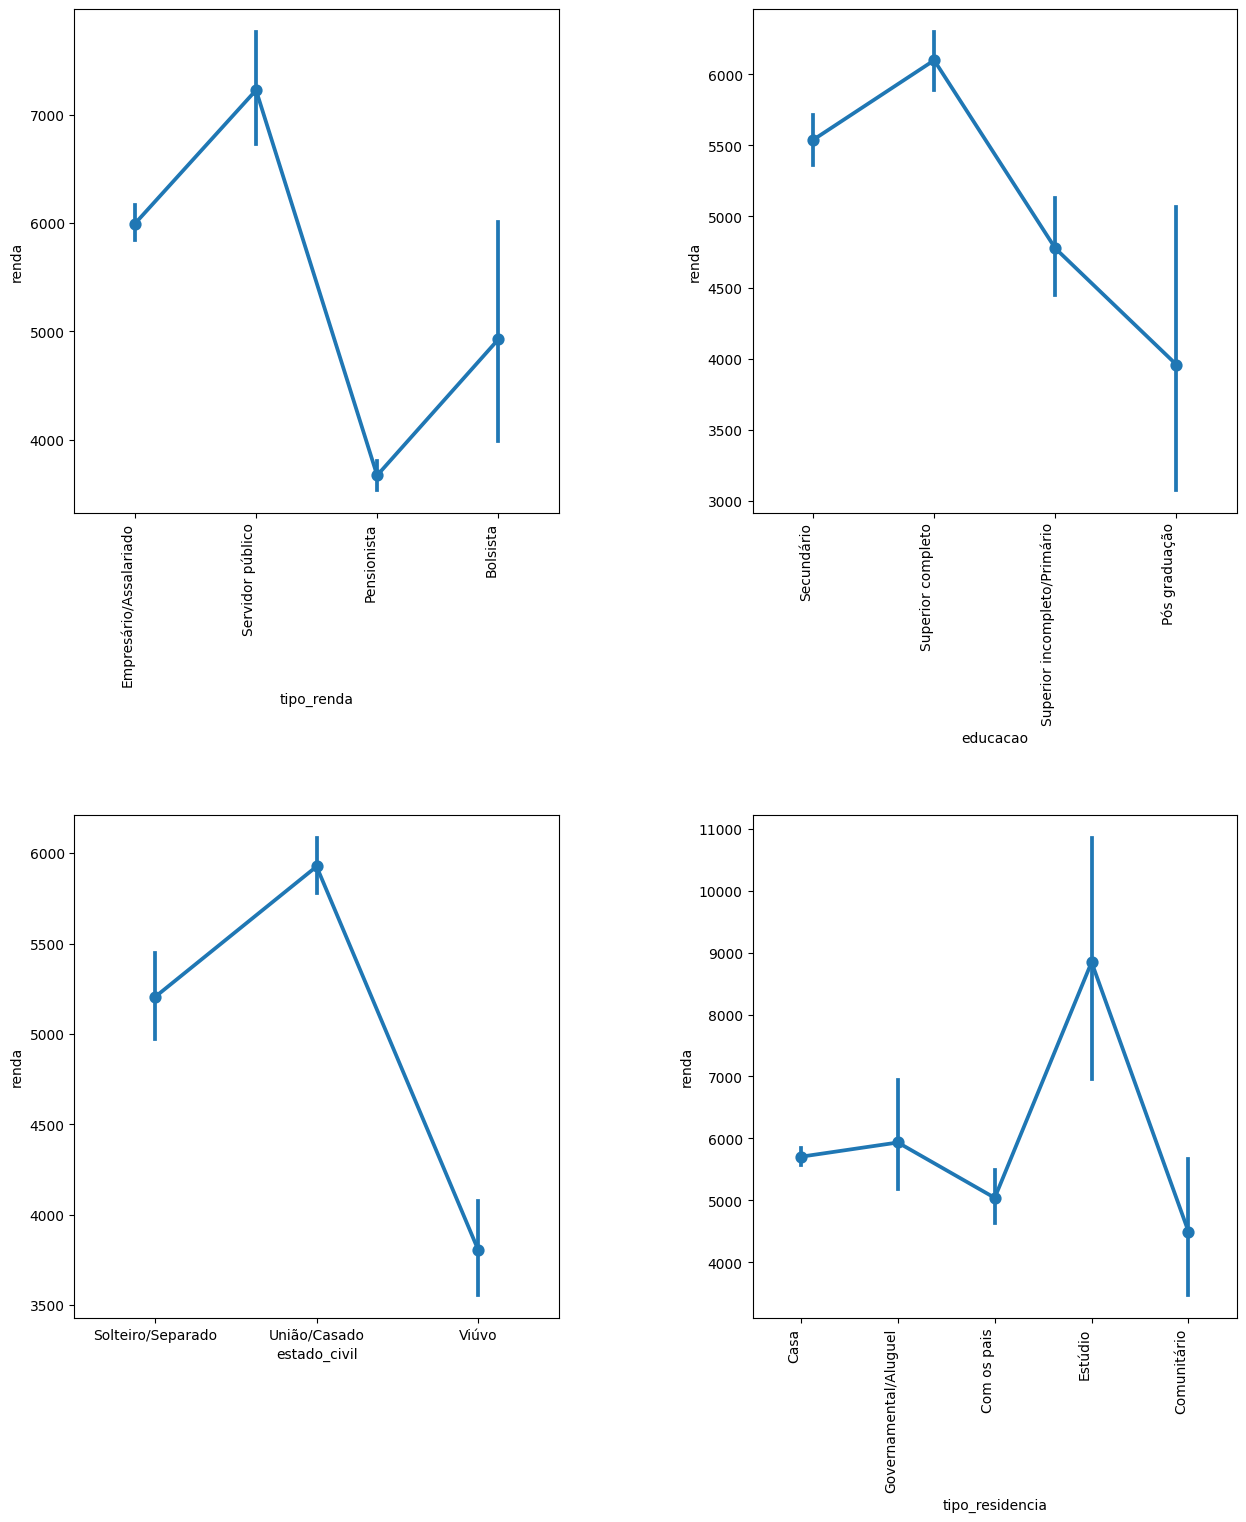

In [ ]:
plt.close('all')

plt.rc('figure', figsize=(15, 17))
fig, axes = plt.subplots(2, 2)

tipo_renda = sns.pointplot(ax = axes[0, 0],y = 'renda', x = 'tipo_renda', data = df2)
educação = sns.pointplot(ax = axes[0, 1],y = 'renda', x = 'educacao', data = df2)
sns.pointplot(ax = axes[1, 0],y = 'renda', x = 'estado_civil', data = df2)
tipo_residencia = sns.pointplot(ax = axes[1, 1],y = 'renda', x = 'tipo_residencia', data = df2)

tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.subplots_adjust(wspace=0.4, hspace=0.6)

In [ ]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:25:48   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.1950      0.304     23.660      0.000       6.599       7.791
C(sexo, Treatment(0))[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
C(posse_de_veiculo, Treatment(0))[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
C(posse_de_imovel, Treatment(0))[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
C(tipo_renda, Treatment(1))[T.Assalariado]           -0.2209      0.241     -0.916      0.360      -0.694       0.252
C(tipo_renda, Treatment(1))[T.Empresário]            -0.0657      0.241     -0.272      0.785      -0.539       0.407
C(tipo_renda, Treatment(1))[T.Pensionista]           -0.5296      0.341     -1.553      0.120      -1.198       0.139
C(tipo_renda, Treatment(1))[T.Servidor público]      -0.1633      0.242     -0.675      0.500      -0.637       0.311
C(educacao, Treatment(1))[T.Primário]                -0.1071      0.159     -0.673      0.501      -0.419       0.205
C(educacao, Treatment(1))[T.Secundário]              -0.1212      0.142     -0.853      0.394      -0.400       0.157
C(educacao, Treatment(1))[T.Superior completo]       -0.0133      0.142     -0.093      0.926      -0.292       0.265
C(educacao, Treatment(1))[T.Superior incompleto]     -0.1502      0.145     -1.035      0.301      -0.435       0.134
C(estado_civil, Treatment(1))[T.Casado]              -0.3265      0.111     -2.935      0.003      -0.545      -0.108
C(estado_civil, Treatment(1))[T.Solteiro]            -0.0593      0.033     -1.809      0.071      -0.124       0.005
C(estado_civil, Treatment(1))[T.União]               -0.3607      0.113     -3.182      0.001      -0.583      -0.138
C(estado_civil, Treatment(1))[T.Viúvo]                0.0424      0.048      0.875      0.382      -0.053       0.137
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0442      0.054      0.815      0.415      -0.062       0.150
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0184      0.029      0.625      0.532      -0.039       0.076
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.0754      0.091     -0.829      0.407      -0.254       0.103
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.1107      0.084      1.319      0.187      -0.054       0.275
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0129      0.039     -0.331      0.741      -0.089       0.064
qtd_filhos                                           -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                                 0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego  

In [ ]:
df2 = df.copy()

In [ ]:
var_qualitativa = df.select_dtypes(include=['int64','float64'])
var_qualitativa.head()

,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,15056,0,26,6.602740,1.0,8060.34
1,1,9968,0,28,7.183562,2.0,1852.15
2,2,4312,0,35,0.838356,2.0,2253.89
3,3,10639,1,30,4.846575,3.0,6600.77
4,4,7064,0,33,4.293151,1.0,6475.97


In [ ]:
var_qualitativa.drop('id_cliente', axis = 1, inplace=True)
var_qualitativa.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,0,26,6.602740,1.0,8060.34
1,1,0,28,7.183562,2.0,1852.15
2,2,0,35,0.838356,2.0,2253.89
3,3,1,30,4.846575,3.0,6600.77
4,4,0,33,4.293151,1.0,6475.97


In [ ]:
var_qualitativa['qtd_filhos'].value_counts()

,count
qtd_filhos,
0,10376
1,3037
2,1376
3,185
4,17
7,5
14,2
5,2


In [ ]:
idade = var_qualitativa['idade'].value_counts()
idade.head()

,count
idade,
40,538
37,469
43,458
32,455
33,441


In [ ]:
tempo_emprego = var_qualitativa['tempo_emprego'].value_counts()
tempo_emprego.head()

,count
tempo_emprego,
4.216438,38
6.934247,30
7.520548,29
15.449315,27
4.517808,26


In [ ]:
qt_pessoas_residencia = var_qualitativa['qt_pessoas_residencia'].value_counts()
qt_pessoas_residencia.head()

,count
qt_pessoas_residencia,
2.0,8181
1.0,2752
3.0,2551
4.0,1311
5.0,179


<ipython-input-31-d9702e98af1a>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  idade.set_xticklabels(idade.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-31-d9702e98af1a>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tempo_emprego.set_xticklabels(tempo_emprego.get_xticklabels(), rotation=90, horizontalalignment='right')


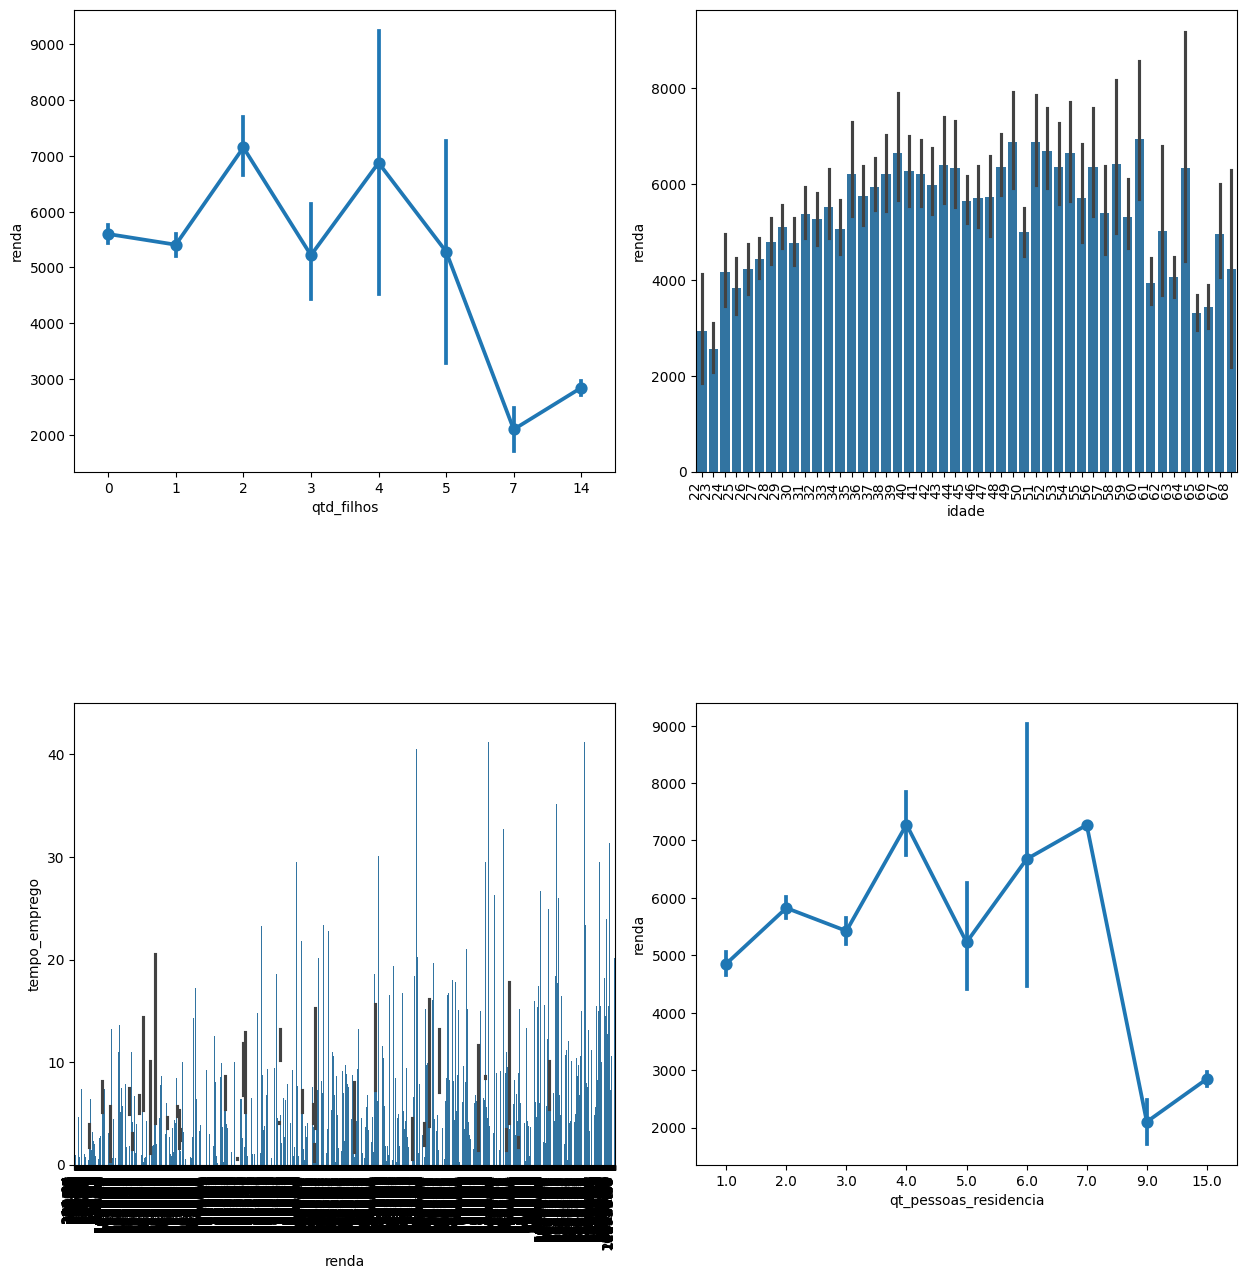

In [31]:
plt.close('all')

plt.rc('figure', figsize=(15, 15))
fig, axes = plt.subplots(2, 2)

sns.pointplot(ax = axes[0, 0],y = 'renda', x = 'qtd_filhos', data = df2)
idade = sns.barplot(ax = axes[0, 1],y = 'renda', x = 'idade', data = df2)
tempo_emprego = sns.barplot(ax = axes[1, 0],y='tempo_emprego', x='renda', data=df2)
sns.pointplot(ax = axes[1, 1],y = 'renda', x = 'qt_pessoas_residencia', data = df2)

idade.set_xticklabels(idade.get_xticklabels(), rotation=90, horizontalalignment='right')
tempo_emprego.set_xticklabels(tempo_emprego.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.subplots_adjust(wspace=0.15, hspace=0.5)

In [32]:
y, x = patsy.dmatrices('''np.log(renda) ~ C(sexo, Treatment(0))
                               + C(posse_de_veiculo, Treatment(0))
                               + C(posse_de_imovel, Treatment(0))
                               + C(tipo_renda, Treatment(1))
                               + C(educacao, Treatment(1))
                               + C(estado_civil, Treatment(1))
                               + C(tipo_residencia, Treatment(1))
                               + C(qtd_filhos, Treatment(2))
                               + idade
                               + tempo_emprego
                               + C(qt_pessoas_residencia, Treatment(2))
                       ''', data = df2)
x

DesignMatrix with shape (12427, 38)
  Columns:
    ['Intercept',
     'C(sexo, Treatment(0))[T.M]',
     'C(posse_de_veiculo, Treatment(0))[T.True]',
     'C(posse_de_imovel, Treatment(0))[T.True]',
     'C(tipo_renda, Treatment(1))[T.Assalariado]',
     'C(tipo_renda, Treatment(1))[T.Empresário]',
     'C(tipo_renda, Treatment(1))[T.Pensionista]',
     'C(tipo_renda, Treatment(1))[T.Servidor público]',
     'C(educacao, Treatment(1))[T.Primário]',
     'C(educacao, Treatment(1))[T.Secundário]',
     'C(educacao, Treatment(1))[T.Superior completo]',
     'C(educacao, Treatment(1))[T.Superior incompleto]',
     'C(estado_civil, Treatment(1))[T.Casado]',
     'C(estado_civil, Treatment(1))[T.Solteiro]',
     'C(estado_civil, Treatment(1))[T.União]',
     'C(estado_civil, Treatment(1))[T.Viúvo]',
     'C(tipo_residencia, Treatment(1))[T.Aluguel]',
     'C(tipo_residencia, Treatment(1))[T.Com os pais]',
     'C(tipo_residencia, Treatment(1))[T.Comunitário]',
     'C(tipo_residencia, Treatm

In [33]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     203.5
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:30:32   Log-Likelihood:                -13559.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12392   BIC:                         2.745e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.1838      0.312     23.053      0.000       6.573       7.795
C(sexo, Treatment(0))[T.M]                            0.7878      0.015     53.664      0.000       0.759       0.817
C(posse_de_veiculo, Treatment(0))[T.True]             0.0436      0.014      3.079      0.002       0.016       0.071
C(posse_de_imovel, Treatment(0))[T.True]              0.0828      0.014      5.907      0.000       0.055       0.110
C(tipo_renda, Treatment(1))[T.Assalariado]           -0.2259      0.241     -0.937      0.349      -0.699       0.247
C(tipo_renda, Treatment(1))[T.Empresário]            -0.0712      0.241     -0.295      0.768      -0.544       0.402
C(tipo_renda, Treatment(1))[T.Pensionista]           -0.5150      0.342     -1.506      0.132      -1.185       0.155
C(tipo_renda, Treatment(1))[T.Servidor público]      -0.1709      0.242     -0.707      0.480      -0.645       0.303
C(educacao, Treatment(1))[T.Primário]                -0.1038      0.159     -0.652      0.515      -0.416       0.208
C(educacao, Treatment(1))[T.Secundário]              -0.1168      0.142     -0.821      0.412      -0.396       0.162
C(educacao, Treatment(1))[T.Superior completo]       -0.0099      0.142     -0.070      0.944      -0.289       0.269
C(educacao, Treatment(1))[T.Superior incompleto]     -0.1458      0.145     -1.002      0.316      -0.431       0.139
C(estado_civil, Treatment(1))[T.Casado]              -0.3176      0.112     -2.831      0.005      -0.537      -0.098
C(estado_civil, Treatment(1))[T.Solteiro]            -0.0619      0.033     -1.862      0.063      -0.127       0.003
C(estado_civil, Treatment(1))[T.União]               -0.3516      0.114     -3.076      0.002      -0.576      -0.128
C(estado_civil, Treatment(1))[T.Viúvo]                0.0360      0.049      0.733      0.463      -0.060       0.132
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0424      0.054      0.784      0.433      -0.064       0.149
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0191      0.029      0.649      0.516      -0.039       0.077
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.0753      0.092     -0.820      0.412      -0.255       0.105
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.1076      0.084      1.281      0.200      -0.057       0.272
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0121      0.039     -0.311      0.756      -0.089       0.064
C(qtd_filhos, Treatment(2))[T.0]                      0.5697      0.223      2.559      0.011       0.133       1.006
C(qtd_filhos, Treatment(2))[T.1]                      0.3196      0.130      2.464      0.014       0.065       0.574
C(qtd_filhos, T

In [34]:
df2.loc[df2['qtd_filhos']>=3, 'qtd_filhos'] = '3+'
df2['qtd_filhos'].value_counts()

<ipython-input-34-37c1f0096a60>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3+' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['qtd_filhos']>=3, 'qtd_filhos'] = '3+'


,count
qtd_filhos,
0,10376
1,3037
2,1376
3+,211


In [35]:
df2.loc[df2['qt_pessoas_residencia']>=4, 'qt_pessoas_residencia'] = '4+'
df2['qt_pessoas_residencia'].value_counts()

<ipython-input-35-9296d6c27928>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4+' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['qt_pessoas_residencia']>=4, 'qt_pessoas_residencia'] = '4+'


,count
qt_pessoas_residencia,
2.0,8181
1.0,2752
3.0,2551
4+,1516


<ipython-input-36-c179a143cae4>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  qtd_filhos.set_xticklabels(qtd_filhos.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-36-c179a143cae4>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  qt_pessoas_residencia.set_xticklabels(qt_pessoas_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')


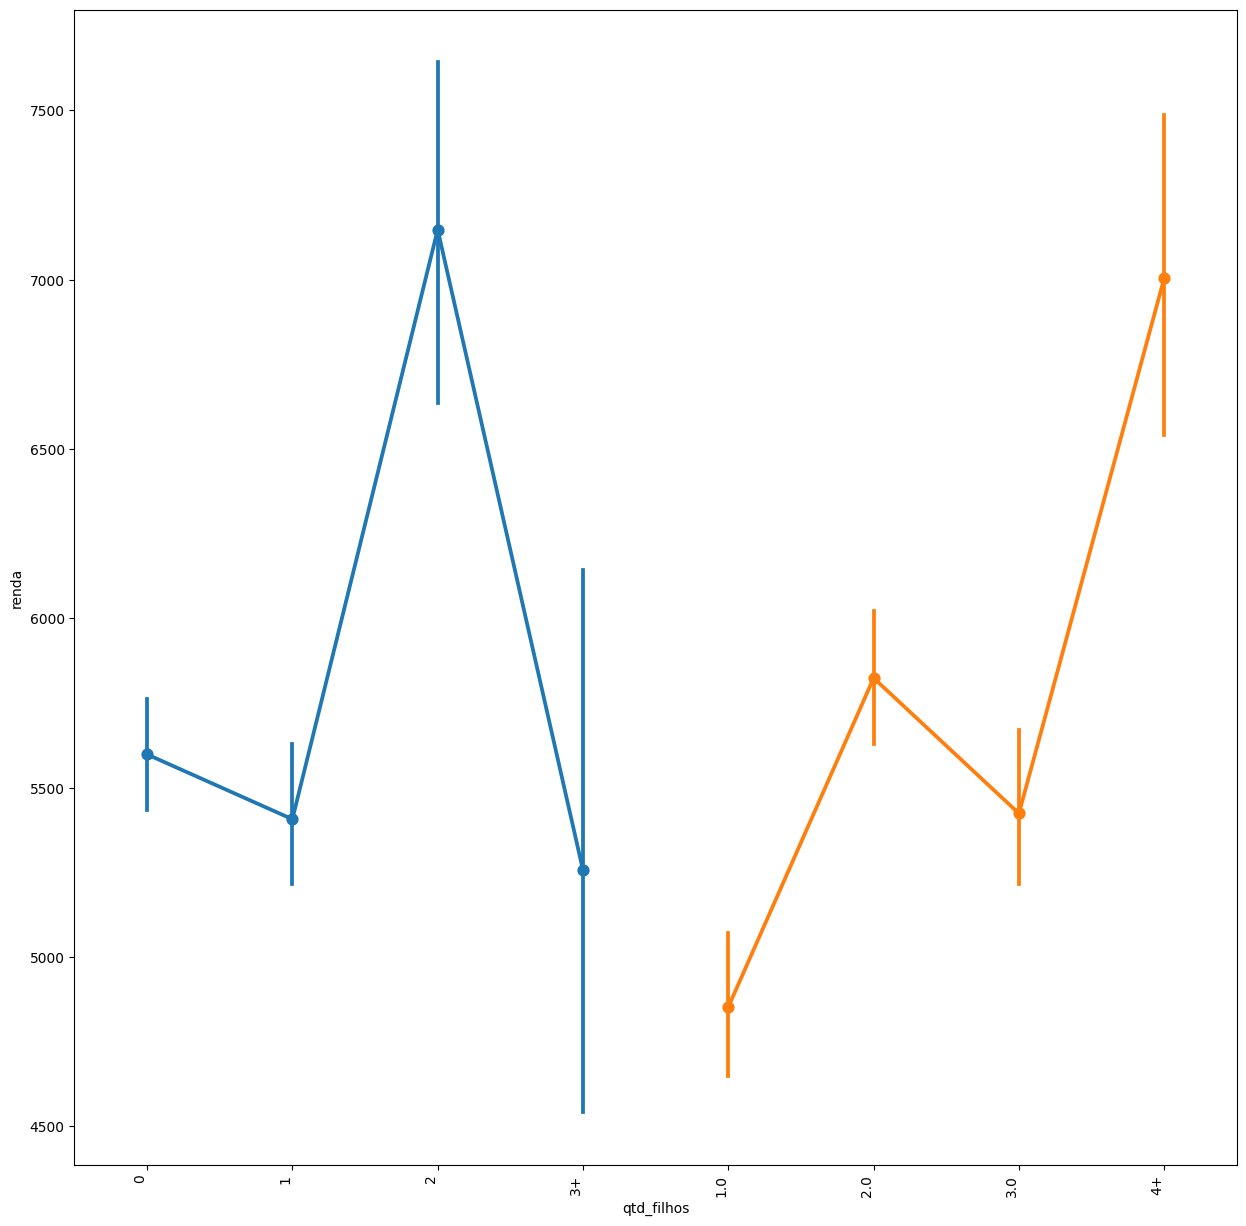

In [36]:
plt.close('all')

plt.rc('figure', figsize=(15, 15))

qtd_filhos = sns.pointplot(y = 'renda', x = 'qtd_filhos', data = df2)
qt_pessoas_residencia = sns.pointplot(y = 'renda', x = 'qt_pessoas_residencia', data = df2)

qtd_filhos.set_xticklabels(qtd_filhos.get_xticklabels(), rotation=90, horizontalalignment='right')
qt_pessoas_residencia.set_xticklabels(qt_pessoas_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.subplots_adjust(wspace=0.15, hspace=0.5)